## Scrape match game and analyze effect of rule50

In [1]:
import lcztools
import lcztools.testing

In [2]:
# WebMatchGame('296143') would work here as well...
mg = lcztools.testing.WebMatchGame('http://lczero.org/match_game/296143')

In [3]:
print(mg.pgn)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "0-1"]

1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. cxd5 exd5 5. Nc3 c6 6. Bf4 Bd6 7. Bxd6 Qxd6 8. e3 O-O 9. h3 Bf5 10. Bd3 Bxd3 11. Qxd3 g6 12. O-O Nbd7 13. Qc2 Rfc8 14. Nd2 b5 15. e4 dxe4 16. Ndxe4 Nxe4 17. Nxe4 Qf4 18. Rac1 Nf6 19. Nxf6+ Qxf6 20. Rfd1 a5 21. Qc5 a4 22. a3 Qe6 23. h4 h5 24. g3 Rab8 25. Kg2 Qe4+ 26. Kg1 Qf3 27. Qc2 Qg4 28. Kg2 Rd8 29. Qxc6 Rxd4 30. Rxd4 Qxd4 31. Rc2 Qd3 32. Rc5 Qe2 33. Qf6 Qe4+ 34. Kh2 Qe2 35. Rc7 Rf8 36. Re7 Qd2 37. Kg2 Qd5+ 38. Kh2 Qc5 39. Kg1 b4 40. axb4 Qxb4 41. Ra7 Qe1+ 42. Kh2 Qb4 43. Ra6 Re8 44. Ra7 Qb3 45. Rd7 Qe6 46. Qxe6 Rxe6 47. Rb7 Ra6 48. Kg2 Kg7 49. Kf3 Kf6 50. Ke4 Ra5 51. Rb6+ Kg7 52. Kd4 a3 53. bxa3 Rxa3 54. Ke4 Ra2 55. Kf3 Ra3+ 56. Kg2 Kg8 57. Rb7 Ra6 58. Kf3 Ra2 59. Ke3 Kg7 60. Rb6 Kf8 61. Rb7 Kg7 62. Rb6 Kh7 63. Rd6 Ra7 64. Kf4 Kg7 65. Kf3 Kf8 66. Rd4 Kg8 67. Ke3 Kg7 68. Re4 Kf6 69. Kf4 Kg7 70. Kf3 Kh6 71. Kf4 Kg7 72. Kf3 Kh6 73. Rf4 Kg7 74. Kg2 Kg8 75. Kf1 K

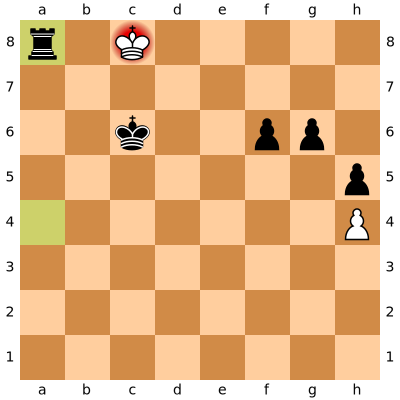

In [4]:
display(mg.board)

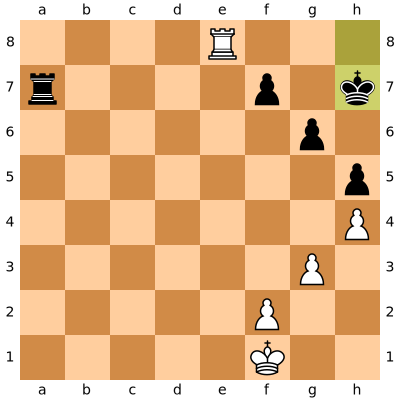

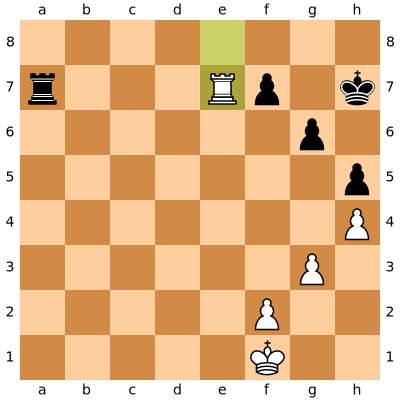

In [5]:
blunder_board = mg.get_leela_board_at(99, 0)
display(blunder_board)
blunder_board = mg.get_leela_board_at(99, 1)
display(blunder_board)

In [6]:
blunder_board.pc_board.halfmove_clock

91

In [7]:
lst = []
for weights in ('weights_317.txt.gz', 'weights_322.txt.gz', 'weights_323.txt.gz'):
    # Load network with default settings from lcztools.ini
    net = lcztools.load_network(filename=weights)
    for movenum, debuguci in [((99,0), 'e8e7'), ((99,1), 'a7e7')]:
        blunder_board = mg.get_leela_board_at(*movenum)
        # display(blunder_board)
        halfmove_clock = blunder_board.pc_board.halfmove_clock
        for rule50 in range(100):
            policy, value = net.evaluate_debug(blunder_board, rule50=rule50)
            # display(policy)
            # display(value)
            lst.append({'halfmove_clock': halfmove_clock, 'weights': weights, debuguci: policy[debuguci], 'value': value, 'rule50': rule50})

Channels 192
Blocks 15
Channels 192
Blocks 15
Channels 192
Blocks 15


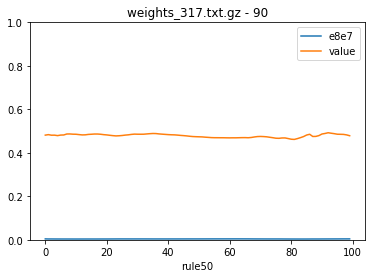

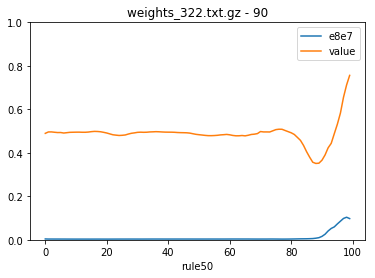

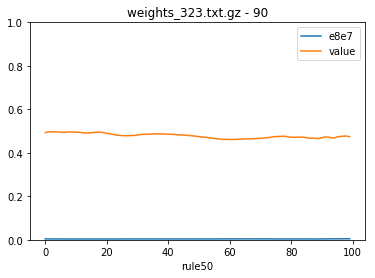

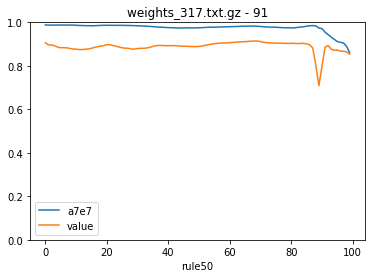

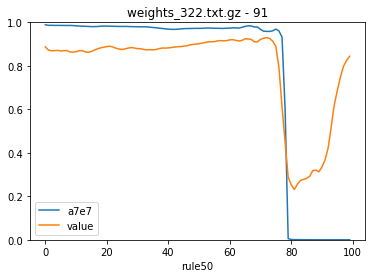

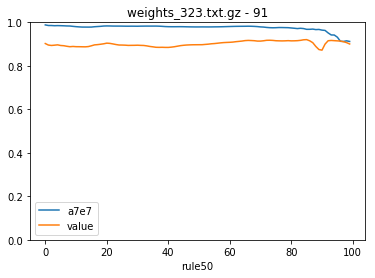

In [8]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(lst)
for (halfmove_clock, weights), dfg in df.groupby(['halfmove_clock', 'weights']):
    # display(halfmove_clock, weights, dfg)
    dfg = dfg.drop(['halfmove_clock', 'weights'], axis=1)
    dfg.set_index('rule50', drop=True).dropna(axis=1) \
        .plot(title='{} - {}'.format(weights, halfmove_clock), ylim=(0,1))